In [1]:
import os
import xml.etree.ElementTree as ET
import pandas as pd

def process_xml_file(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    filename = root.find('filename').text
    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)
    depth = int(size.find('depth').text)

    data = []
    for obj in root.findall('object'):
        name = obj.find('name').text
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)
        data.append({
            'filename': filename,
            'width': width,
            'height': height,
            'depth': depth,
            'name': name,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax
        })

    return data

# Specify the folder path containing the XML files
folder_path = 'pascal_voc_annotations'

# Create an empty list to store the processed data
data = []

# Iterate over the XML files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.xml'):
        file_path = os.path.join(folder_path, filename)
        xml_data = process_xml_file(file_path)
        data.extend(xml_data)

# Create the DataFrame
df = pd.DataFrame(data)

df

,filename,width,height,depth,name,xmin,ymin,xmax,ymax
0,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),0,216,528,470
1,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),769,226,1024,451
2,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),491,157,927,336
3,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),16,186,279,318
4,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),123,0,243,31
...,...,...,...,...,...,...,...,...,...
104527,ffef8fa6031038f9.jpg,1024,768,3,car_(automobile),768,339,779,345
104528,ffef8fa6031038f9.jpg,1024,768,3,car_(automobile),736,339,753,346
104529,ffef8fa6031038f9.jpg,1024,768,3,car_(automobile),919,333,935,340
104530,fff419b5ba84d9b5.jpg,1024,768,3,car_(automobile),22,257,131,284


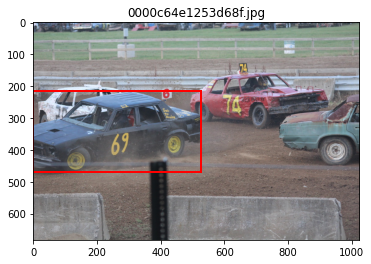

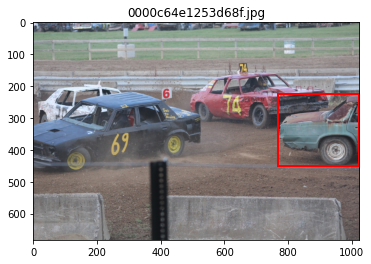

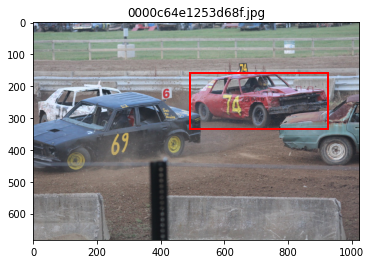

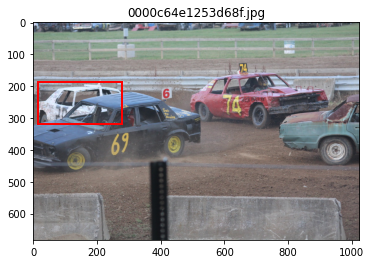

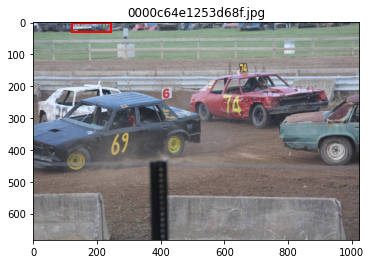

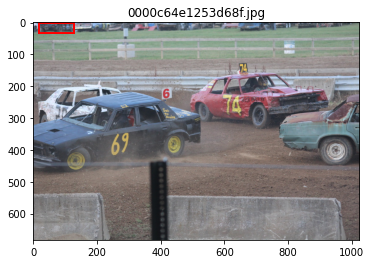

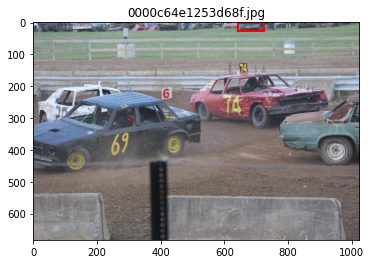

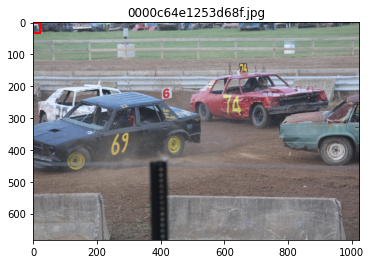

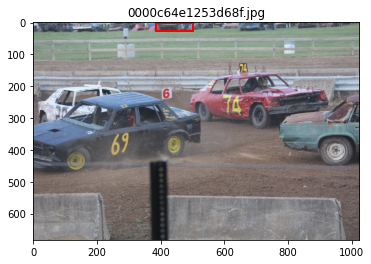

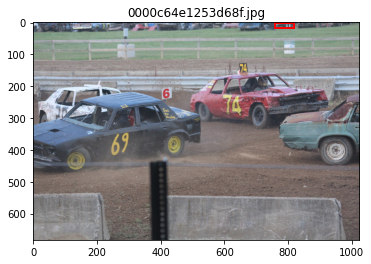

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


image_folder_path = '/workspace/yolo_v8_training/oiv7_full/test/'


for _, row in df.head(10).iterrows():
    filename = row['filename']
    xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
    
    # Load the corresponding image
    
    image_path = os.path.join(image_folder_path, filename)
    image = Image.open(image_path)
    
    # Create a figure and axes
    fig, ax = plt.subplots()
    
    # Display the image
    ax.imshow(image)
    
    # Create a rectangle patch for the bounding box
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the rectangle patch to the axes
    ax.add_patch(rect)
    
    # Set the title and display the plot
    ax.set_title(filename)
    plt.show()

In [3]:
df

,filename,width,height,depth,name,xmin,ymin,xmax,ymax
0,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),0,216,528,470
1,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),769,226,1024,451
2,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),491,157,927,336
3,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),16,186,279,318
4,0000c64e1253d68f.jpg,1024,683,3,car_(automobile),123,0,243,31
...,...,...,...,...,...,...,...,...,...
104527,ffef8fa6031038f9.jpg,1024,768,3,car_(automobile),768,339,779,345
104528,ffef8fa6031038f9.jpg,1024,768,3,car_(automobile),736,339,753,346
104529,ffef8fa6031038f9.jpg,1024,768,3,car_(automobile),919,333,935,340
104530,fff419b5ba84d9b5.jpg,1024,768,3,car_(automobile),22,257,131,284


In [4]:
df_annots = df[['filename', 'name', 'xmin', 'ymin', 'xmax', 'ymax']]
df_annots.rename(columns={'name':'label'}, inplace=True)
df_annots

<ipython-input-4-814045563ed2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annots.rename(columns={'name':'label'}, inplace=True)


,filename,label,xmin,ymin,xmax,ymax
0,0000c64e1253d68f.jpg,car_(automobile),0,216,528,470
1,0000c64e1253d68f.jpg,car_(automobile),769,226,1024,451
2,0000c64e1253d68f.jpg,car_(automobile),491,157,927,336
3,0000c64e1253d68f.jpg,car_(automobile),16,186,279,318
4,0000c64e1253d68f.jpg,car_(automobile),123,0,243,31
...,...,...,...,...,...,...
104527,ffef8fa6031038f9.jpg,car_(automobile),768,339,779,345
104528,ffef8fa6031038f9.jpg,car_(automobile),736,339,753,346
104529,ffef8fa6031038f9.jpg,car_(automobile),919,333,935,340
104530,fff419b5ba84d9b5.jpg,car_(automobile),22,257,131,284


In [5]:
df_annots['filename'] = image_folder_path + df_annots['filename']
df_annots

<ipython-input-5-950fdc64c5bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annots['filename'] = image_folder_path + df_annots['filename']


,filename,label,xmin,ymin,xmax,ymax
0,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),0,216,528,470
1,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),769,226,1024,451
2,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),491,157,927,336
3,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),16,186,279,318
4,/workspace/yolo_v8_training/oiv7_full/test/000...,car_(automobile),123,0,243,31
...,...,...,...,...,...,...
104527,/workspace/yolo_v8_training/oiv7_full/test/ffe...,car_(automobile),768,339,779,345
104528,/workspace/yolo_v8_training/oiv7_full/test/ffe...,car_(automobile),736,339,753,346
104529,/workspace/yolo_v8_training/oiv7_full/test/ffe...,car_(automobile),919,333,935,340
104530,/workspace/yolo_v8_training/oiv7_full/test/fff...,car_(automobile),22,257,131,284
